In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%load_ext autoreload
%autoreload 2
from ieee80211phy.transmitter.main import build_package, hex_to_bitstr, flip_byte_endian

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


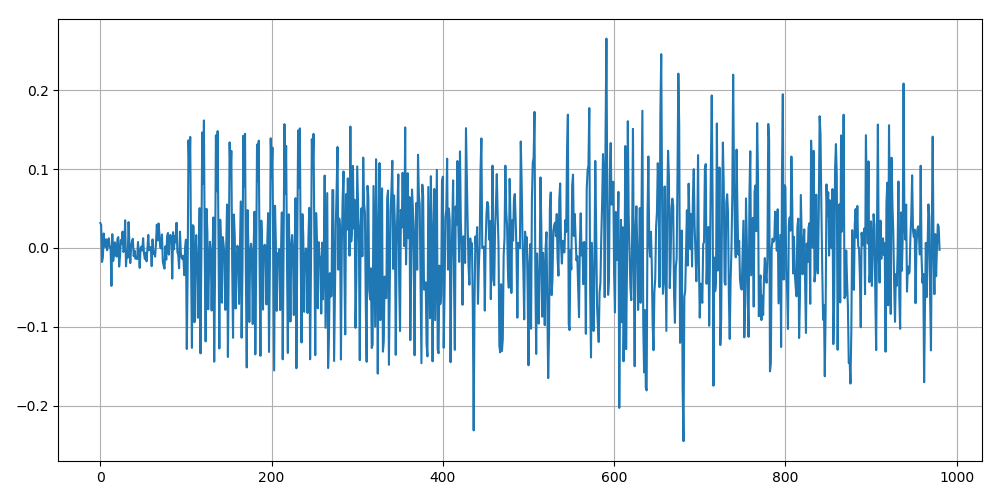

/home/gaspar/.local/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [68]:
data = '0x0402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B6'
bits = flip_byte_endian(hex_to_bitstr(data))

tx = build_package(bits, data_rate=36)
head = (np.random.normal(size=100) + np.random.normal(size=100)*1j) * 0.01

tx = np.concatenate([head, tx])

channel = (np.random.normal(size=len(tx)) + np.random.normal(size=len(tx))*1j) * 0.01
tx += channel

plt.figure(figsize=(10,5))
plt.plot(tx)
plt.tight_layout()
plt.grid()

/usr/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


<IPython.core.display.Javascript object>


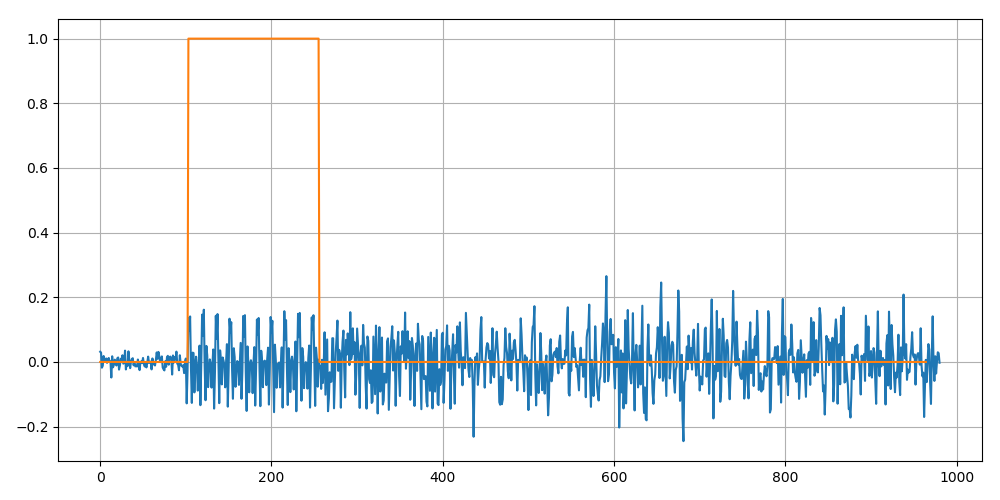

/home/gaspar/.local/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [69]:
from ieee80211phy.receiver.packet_detector import packet_detector
det = packet_detector(tx)

plt.figure(figsize=(10,5))
plt.plot(tx)
plt.plot(det)
plt.tight_layout()
plt.grid()

/usr/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


<IPython.core.display.Javascript object>


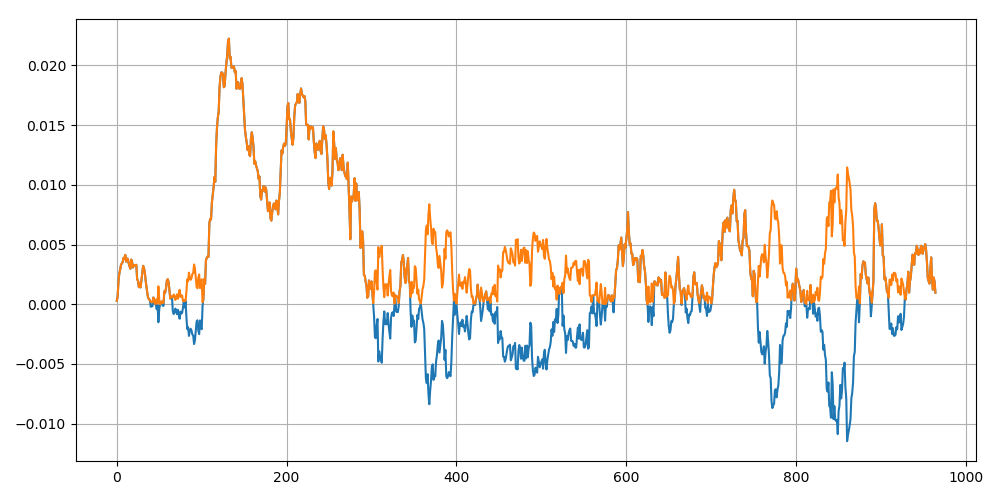

In [65]:
def average(inputs, window_len):
    taps = [1 / window_len] * window_len
    return signal.lfilter(taps, [1.0], inputs)

mult = tx[:-16] * np.conjugate(tx[16:])
avg = average(mult, 32)
autocorr = avg.real

mult = tx[:-16] * np.conjugate(tx[16:])
avg = average(mult.real, 32)
autocorr2 = np.abs(avg)

plt.figure(figsize=(10,5))
plt.plot(autocorr)
plt.plot(autocorr2)
plt.tight_layout()
plt.grid()

/usr/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


<IPython.core.display.Javascript object>


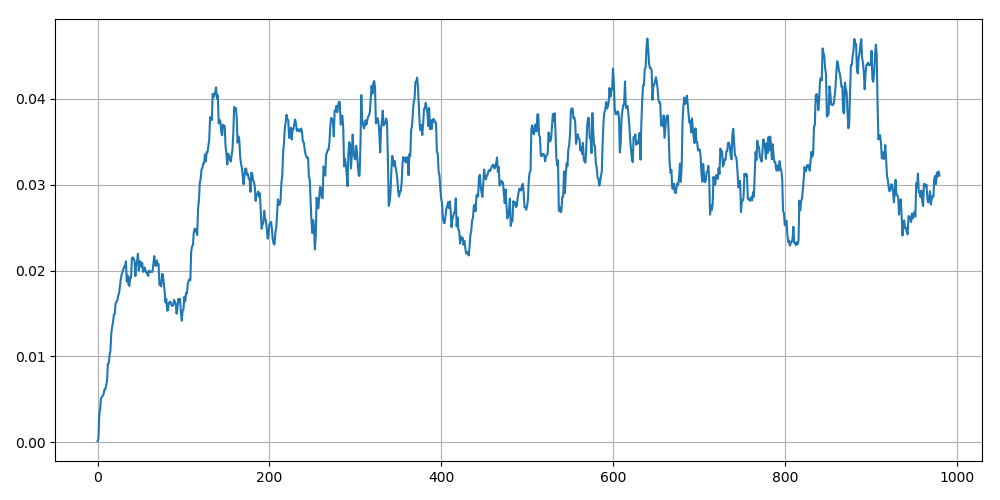

In [66]:
tmp = (tx * np.conjugate(tx)).real
avg = average(tmp, 32)
power = avg

plt.figure(figsize=(10,5))
plt.plot(power)
plt.tight_layout()
plt.grid()

<IPython.core.display.Javascript object>


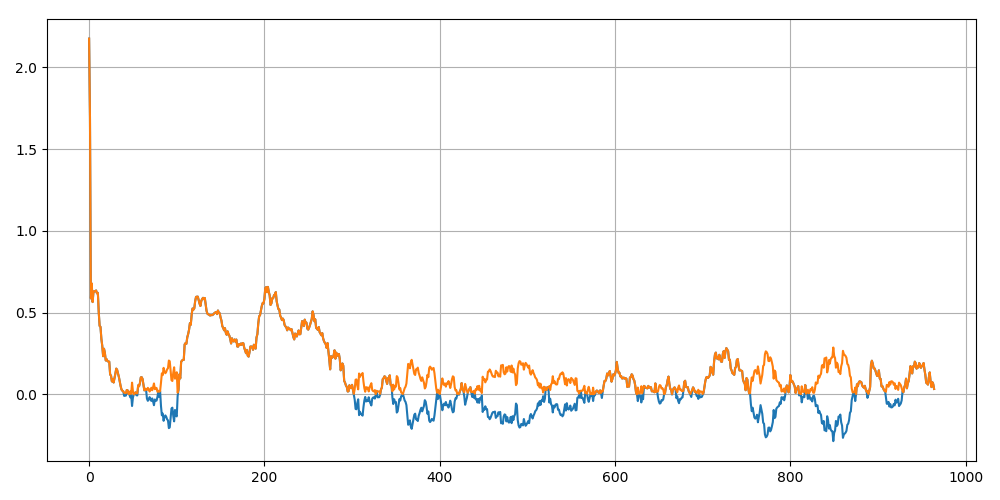

In [67]:
ratio = autocorr / power[:len(autocorr)]
ratio2 = autocorr2 / power[:len(autocorr2)]
plt.figure(figsize=(10,5))
plt.plot(ratio)
plt.plot(ratio2)
plt.tight_layout()
plt.grid()